<a href="https://colab.research.google.com/github/SHREERAJ11/Road-Mark-Detection/blob/main/Dataset/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download pkdarabi/road-mark-detection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/road-mark-detection
License(s): Attribution 4.0 International (CC BY 4.0)
100% 161M/161M [00:08<00:00, 23.6MB/s]
100% 161M/161M [00:08<00:00, 20.3MB/s]


In [3]:
! unzip road-mark-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/161b_jpg.rf.85f842102d7d7c6a3a8f9c93529c75b2.jpg  
  inflating: train/images/162a_jpg.rf.03425938f4f2d24be2e6c8a1686402ac.jpg  
  inflating: train/images/162b_jpg.rf.f9cad32427fe31938c0c0a01a4f47d4f.jpg  
  inflating: train/images/162c_jpg.rf.25bb41e5d59ec73f2db179022e1a9495.jpg  
  inflating: train/images/162d_jpg.rf.1fc78c1c28e08d111a29be67e80acd07.jpg  
  inflating: train/images/163_jpg.rf.6d8b5b078a7941ca338aa7019e8ec146.jpg  
  inflating: train/images/163b_jpg.rf.ae02ecd22abc81561cdc0397ef47a52c.jpg  
  inflating: train/images/164_jpg.rf.dd2ab2f31ab71fa5fbe6767d50a01a2c.jpg  
  inflating: train/images/165_jpg.rf.7a7719222c9d36709a26d63ee4df3567.jpg  
  inflating: train/images/165a_jpg.rf.a5c17a8f88f8d89629b569c341792808.jpg  
  inflating: train/images/165b_jpg.rf.f34b30ab4021c291d53f991b5c29a986.jpg  
  inflating: train/images/165d_jpg.rf.e3f350bc04c489fd5f5f1d714c152032.jpg  
  inflating: train/images/16

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define data directories
train_dir = '/content/train'
valid_dir = '/content/valid'
test_dir = '/content/test'

Check Distribution of Images

In [6]:
train_images = os.listdir(os.path.join(train_dir, 'images'))
valid_images = os.listdir(os.path.join(valid_dir, 'images'))
test_images = os.listdir(os.path.join(test_dir, 'images'))

In [7]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(valid_images)}")
print(f"Number of test images: {len(test_images)}")

Number of training images: 2167
Number of validation images: 417
Number of test images: 192


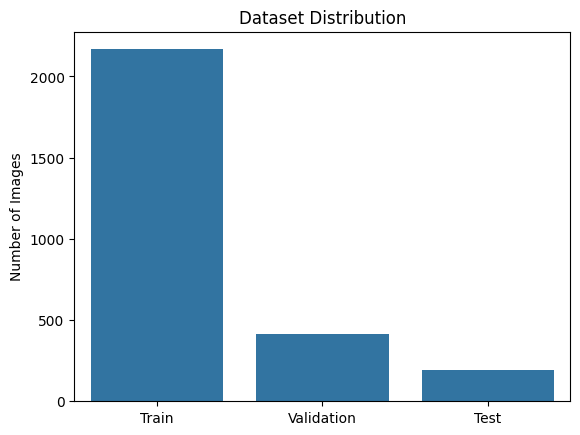

In [8]:
sns.barplot(x=['Train', 'Validation', 'Test'], y=[len(train_images), len(valid_images), len(test_images)])
plt.title('Dataset Distribution')
plt.ylabel('Number of Images')
plt.show()

Visualize Sample Images

In [9]:
def show_sample_images(image_dir, title, num_samples=5):
    image_files = os.listdir(image_dir)
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = os.path.join(image_dir, image_files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

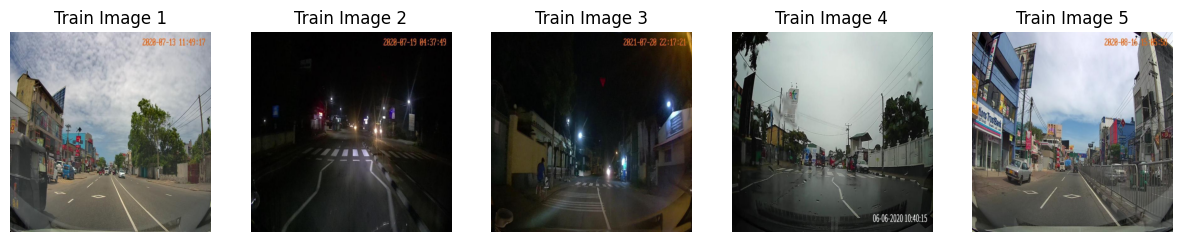

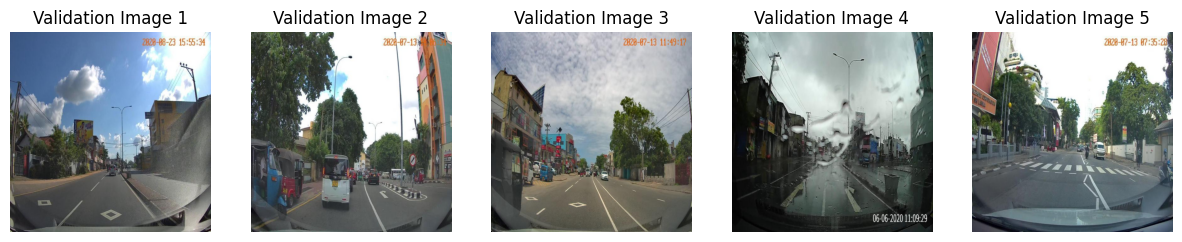

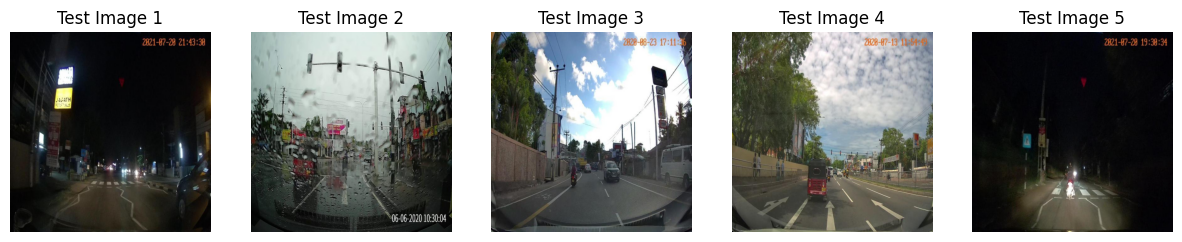

In [10]:
show_sample_images(os.path.join(train_dir, 'images'), 'Train Image')
show_sample_images(os.path.join(valid_dir, 'images'), 'Validation Image')
show_sample_images(os.path.join(test_dir, 'images'), 'Test Image')

Analyze Label Data

In [11]:
def analyze_labels(label_dir, dataset_name):
    label_files = os.listdir(label_dir)
    num_labels = len(label_files)
    print(f"Number of {dataset_name} labels: {num_labels}")

    all_labels = []
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            data = file.readlines()
            for line in data:
                all_labels.append(line.split()[0])

    unique_labels, counts = np.unique(all_labels, return_counts=True)
    sns.barplot(x=unique_labels, y=counts)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()


Number of Training labels: 2167


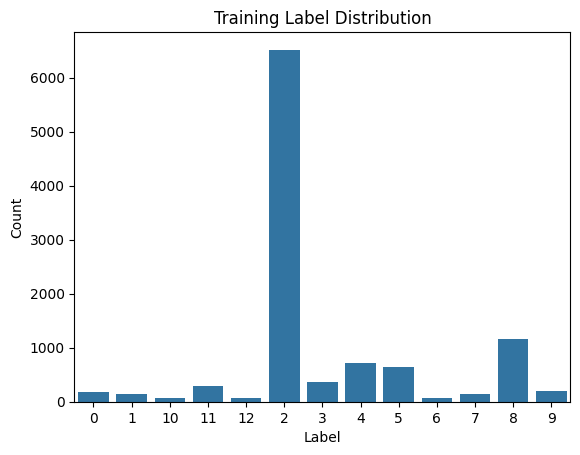

Number of Validation labels: 417


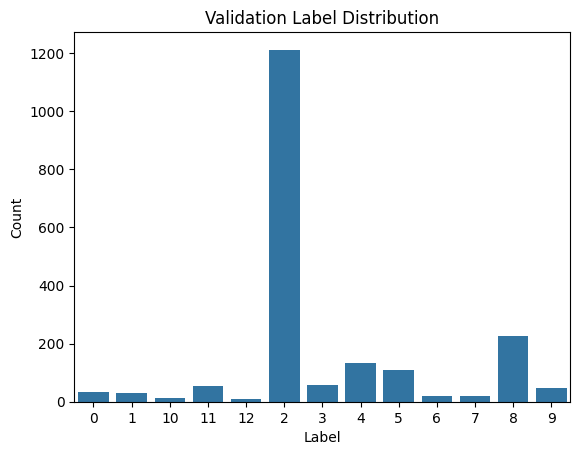

Number of Test labels: 192


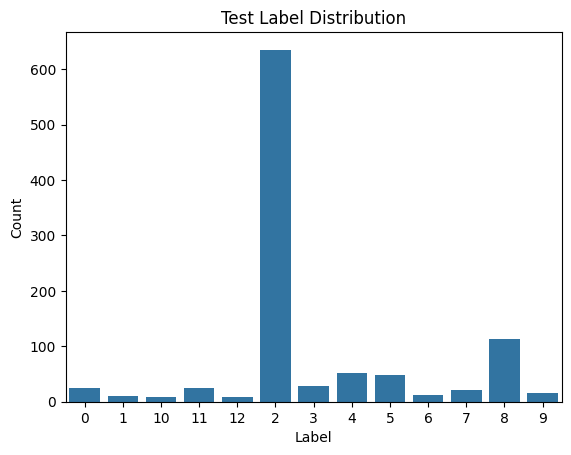

In [12]:
analyze_labels(os.path.join(train_dir, 'labels'), 'Training')
analyze_labels(os.path.join(valid_dir, 'labels'), 'Validation')
analyze_labels(os.path.join(test_dir, 'labels'), 'Test')

Visualize Sample Image with Labels

In [13]:
def show_image_with_labels(image_dir, label_dir, title, num_samples=3):
    image_files = os.listdir(image_dir)
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = os.path.join(image_dir, image_files[i])
        label_path = os.path.join(label_dir, image_files[i].replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)

        if os.path.exists(label_path):
            with open(label_path, 'r') as file:
                data = file.readlines()
                for line in data:
                    elements = line.split()
                    points = np.array(elements[1:], dtype=np.float32).reshape(-1, 2)
                    for point in points:
                        cv2.circle(img, (int(point[0] * img.shape[1]), int(point[1] * img.shape[0])), 5, (255, 0, 0), -1)

        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()


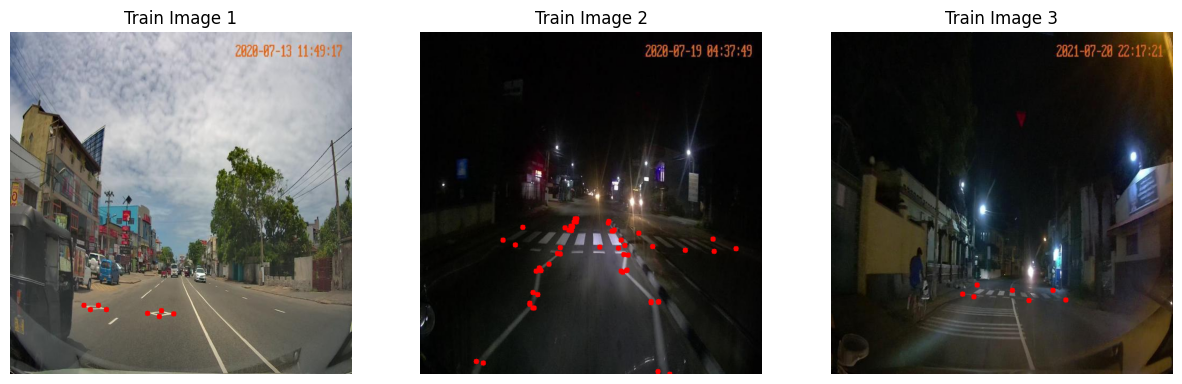

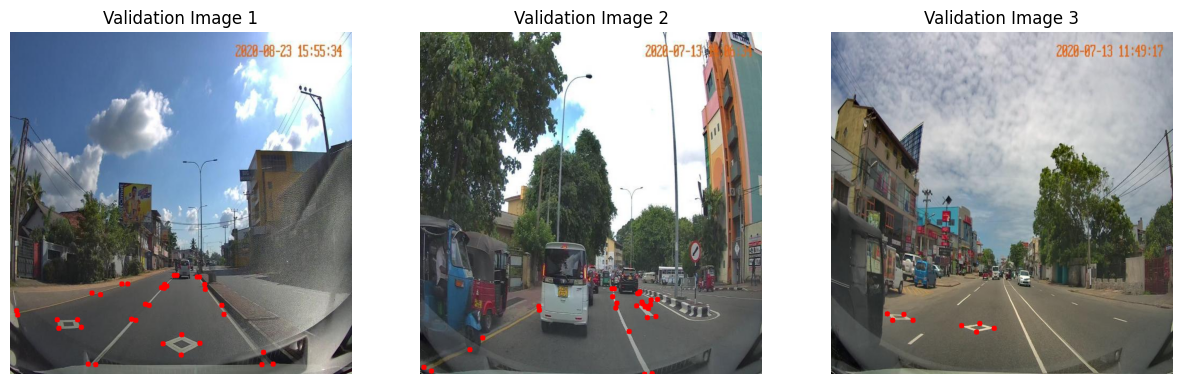

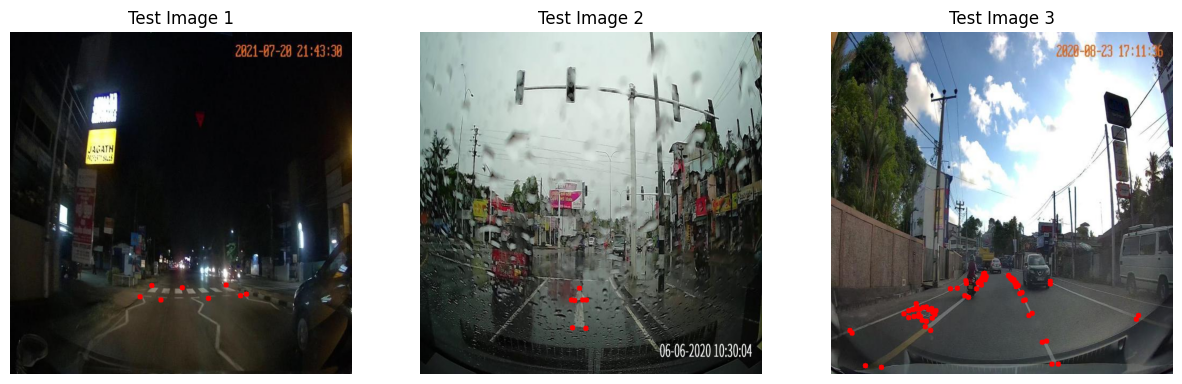

In [14]:
show_image_with_labels(os.path.join(train_dir, 'images'), os.path.join(train_dir, 'labels'), 'Train Image')
show_image_with_labels(os.path.join(valid_dir, 'images'), os.path.join(valid_dir, 'labels'), 'Validation Image')
show_image_with_labels(os.path.join(test_dir, 'images'), os.path.join(test_dir, 'labels'), 'Test Image')

Summary Statistics

In [15]:
def compute_summary_statistics(image_dir, dataset_name):
    image_files = os.listdir(image_dir)
    img_shapes = []
    for image_file in image_files:
        img_path = os.path.join(image_dir, image_file)
        img = cv2.imread(img_path)
        img_shapes.append(img.shape)

    img_shapes = np.array(img_shapes)
    print(f"{dataset_name} Dataset Summary:")
    print(f" - Number of images: {img_shapes.shape[0]}")
    print(f" - Average width: {np.mean(img_shapes[:, 1])}")
    print(f" - Average height: {np.mean(img_shapes[:, 0])}")
    print(f" - Average channels: {np.mean(img_shapes[:, 2])}")


In [16]:
compute_summary_statistics(os.path.join(train_dir, 'images'), 'Training')
compute_summary_statistics(os.path.join(valid_dir, 'images'), 'Validation')
compute_summary_statistics(os.path.join(test_dir, 'images'), 'Test')

Training Dataset Summary:
 - Number of images: 2167
 - Average width: 640.0
 - Average height: 640.0
 - Average channels: 3.0
Validation Dataset Summary:
 - Number of images: 417
 - Average width: 640.0
 - Average height: 640.0
 - Average channels: 3.0
Test Dataset Summary:
 - Number of images: 192
 - Average width: 640.0
 - Average height: 640.0
 - Average channels: 3.0


Label Distribution Analysis

In [17]:
def plot_label_distribution(label_dir, dataset_name):
    all_labels = []
    label_files = os.listdir(label_dir)
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            data = file.readlines()
            for line in data:
                label = line.split()[0]
                all_labels.append(label)

    sns.countplot(x=all_labels)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

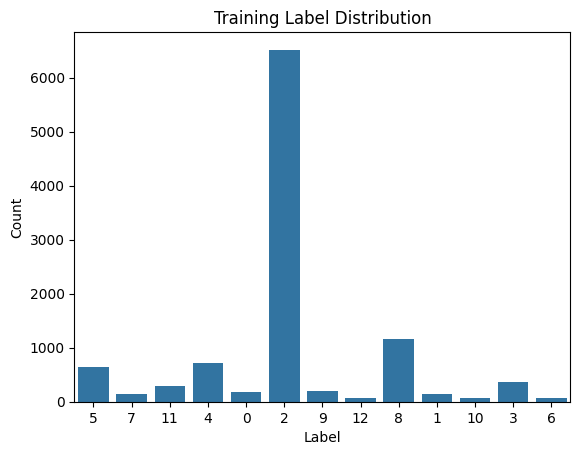

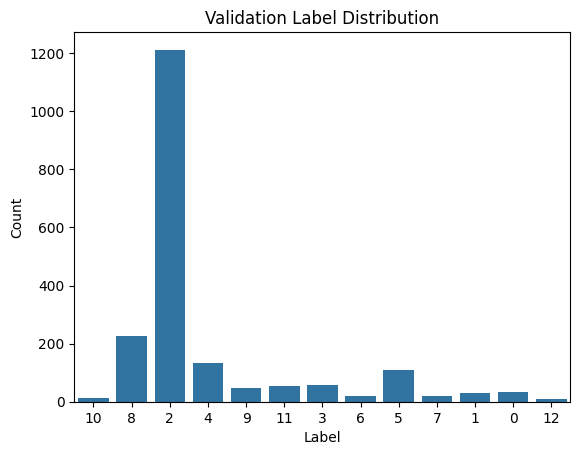

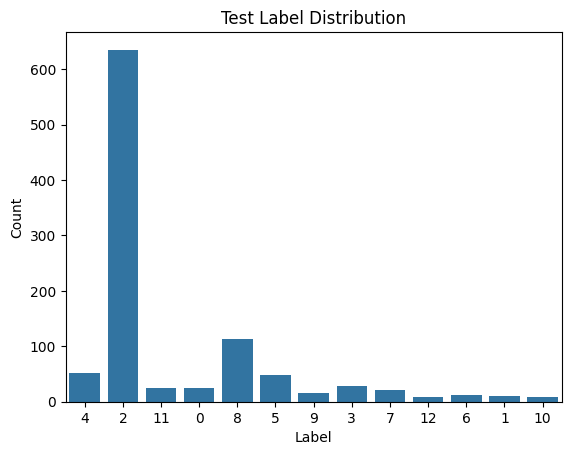

In [18]:
plot_label_distribution(os.path.join(train_dir, 'labels'), 'Training')
plot_label_distribution(os.path.join(valid_dir, 'labels'), 'Validation')
plot_label_distribution(os.path.join(test_dir, 'labels'), 'Test')

Bounding Box Analysis

In [19]:
def analyze_bounding_box_sizes(label_dir, dataset_name):
    bbox_widths = []
    bbox_heights = []
    label_files = os.listdir(label_dir)
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            data = file.readlines()
            for line in data:
                elements = line.split()
                points = np.array(elements[1:], dtype=np.float32).reshape(-1, 2)
                if len(points) == 2:
                    width = abs(points[1][0] - points[0][0])
                    height = abs(points[1][1] - points[0][1])
                    bbox_widths.append(width)
                    bbox_heights.append(height)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(bbox_widths, bins=30)
    plt.title(f'{dataset_name} Bounding Box Widths')
    plt.xlabel('Width')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(bbox_heights, bins=30)
    plt.title(f'{dataset_name} Bounding Box Heights')
    plt.xlabel('Height')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


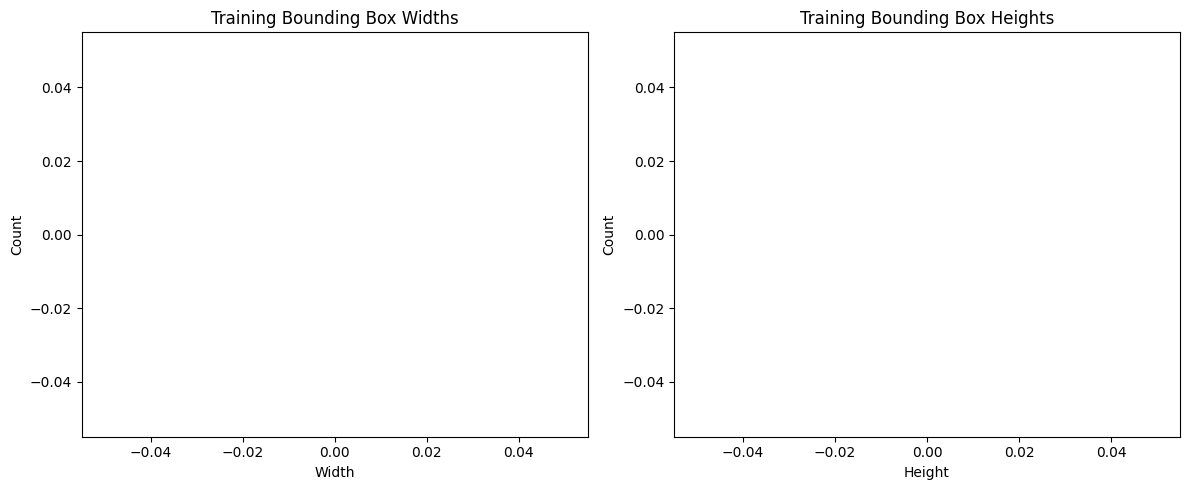

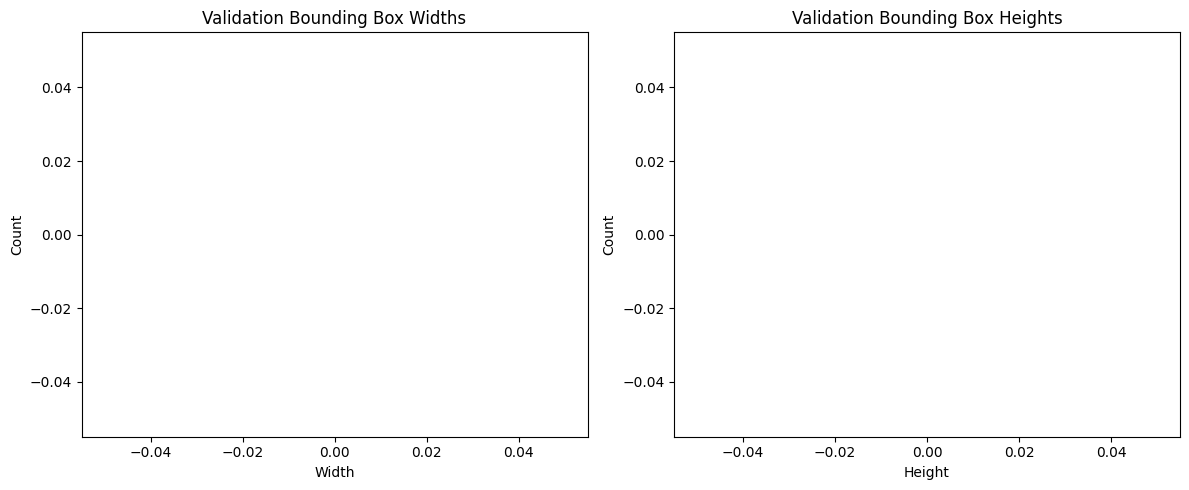

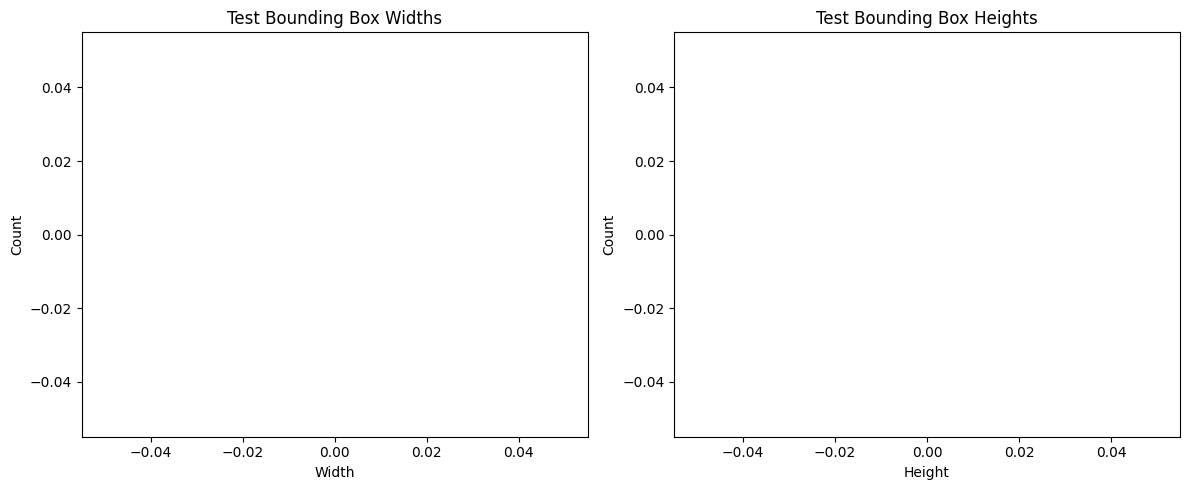

In [20]:
analyze_bounding_box_sizes(os.path.join(train_dir, 'labels'), 'Training')
analyze_bounding_box_sizes(os.path.join(valid_dir, 'labels'), 'Validation')
analyze_bounding_box_sizes(os.path.join(test_dir, 'labels'), 'Test')

Image Aspect Ratio Analysis

In [21]:
def analyze_image_aspect_ratios(image_dir, dataset_name):
    aspect_ratios = []
    image_files = os.listdir(image_dir)
    for image_file in image_files:
        img_path = os.path.join(image_dir, image_file)
        img = cv2.imread(img_path)
        height, width, _ = img.shape
        aspect_ratio = width / height
        aspect_ratios.append(aspect_ratio)

    sns.histplot(aspect_ratios, bins=30)
    plt.title(f'{dataset_name} Image Aspect Ratios')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Count')
    plt.show()

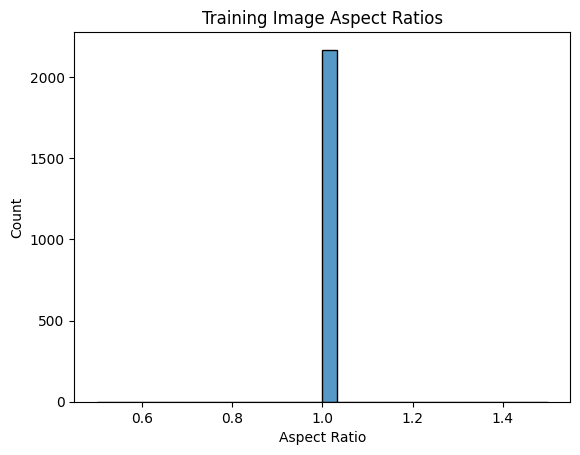

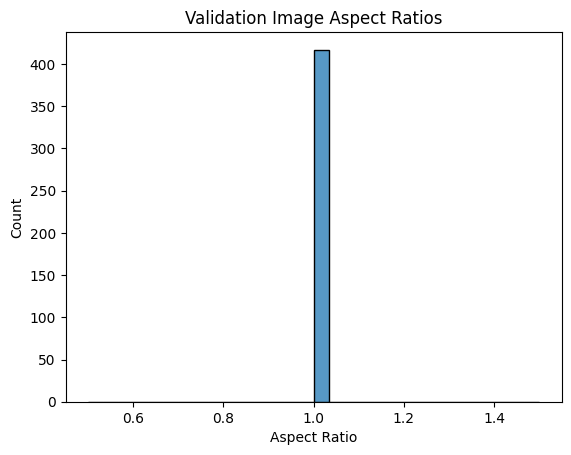

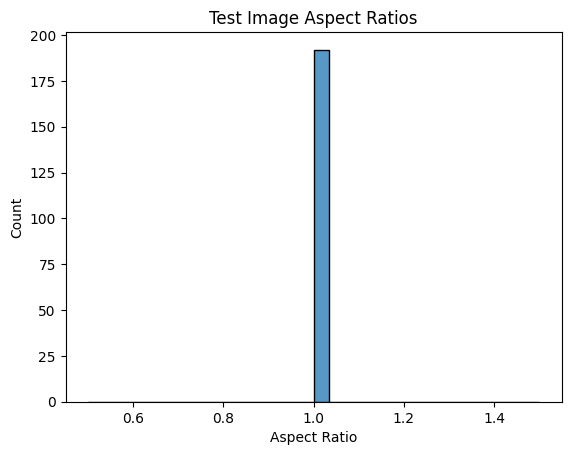

In [22]:
analyze_image_aspect_ratios(os.path.join(train_dir, 'images'), 'Training')
analyze_image_aspect_ratios(os.path.join(valid_dir, 'images'), 'Validation')
analyze_image_aspect_ratios(os.path.join(test_dir, 'images'), 'Test')

Data Augmentation Visualization

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def visualize_data_augmentation(image_dir, num_samples=5):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    image_files = os.listdir(image_dir)
    img_path = os.path.join(image_dir, image_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, 0)

    plt.figure(figsize=(15, 5))
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        plt.subplot(1, num_samples, i+1)
        aug_img = batch[0].astype('uint8')
        plt.imshow(aug_img)
        plt.axis('off')
        i += 1
        if i == num_samples:
            break
    plt.show()


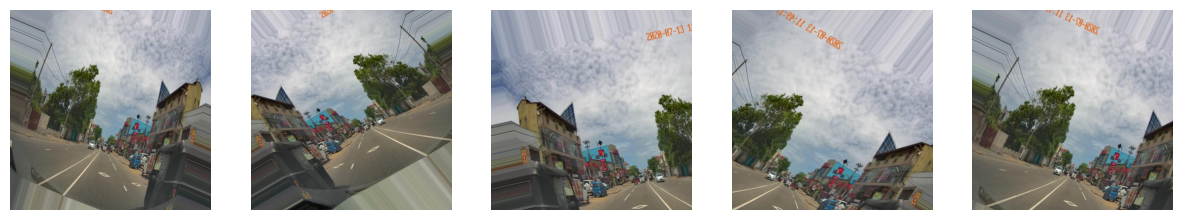

In [28]:
visualize_data_augmentation(os.path.join(train_dir, 'images'))